In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import os
import joblib

In [3]:
script_dir = os.getcwd()
data_dir = Path(script_dir).parent / "data"
model_dir = Path(script_dir).parent / "models"

In [4]:
# Load the preprocessed data
X_train = np.load(f'{data_dir}/X_train_final.npy')
X_val = np.load(f'{data_dir}/X_val_final.npy')
X_test = np.load(f'{data_dir}/X_test_final.npy')

y_train_log = np.load(f'{data_dir}/y_train_log.npy')  # Log-transformed version!
y_val_log = np.load(f'{data_dir}/y_val_log.npy')
y_test_log = np.load(f'{data_dir}/y_test_log.npy')

In [5]:
# Combine validation and test sets
X_combined_test = np.concatenate((X_val, X_test), axis=0)
y_combined_test_log = np.concatenate((y_val_log, y_test_log), axis=0)

In [6]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Fit the linear regression model on the training data
linear_model.fit(X_train, y_train_log)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
# Make predictions on the combined test set (log-transformed) using linear regression
y_combined_test_pred_log_linear = linear_model.predict(X_combined_test)

# Make predictions on the training set (log-transformed) using linear regression
y_train_pred_log_linear = linear_model.predict(X_train)

# Convert log-transformed predictions to original scale for linear regression
y_train_pred_linear = np.expm1(y_train_pred_log_linear)

# Convert log-transformed predictions to original scale for linear regression
y_combined_test_pred_linear = np.expm1(y_combined_test_pred_log_linear)
y_combined_test = np.expm1(y_combined_test_log)

# Calculate performance metrics for combined test set in original scale for linear regression
mse_combined_test_linear = mean_squared_error(y_combined_test, y_combined_test_pred_linear)
r2_combined_test_linear = r2_score(y_combined_test, y_combined_test_pred_linear)
mae_combined_test_linear = np.mean(np.abs(y_combined_test - y_combined_test_pred_linear)/y_combined_test) * 100

print(f'Linear Regression - Combined Test RMSE (original scale): {np.sqrt(mse_combined_test_linear)}')
print(f'Linear Regression - Combined Test R^2 (original scale): {r2_combined_test_linear}')
print(f'Linear Regression - Combined Test MAE% (original scale): {mae_combined_test_linear}')

Linear Regression - Combined Test RMSE (original scale): 36861510.993374765
Linear Regression - Combined Test R^2 (original scale): -19618728.99876985
Linear Regression - Combined Test MAE% (original scale): 377.34251877644147


In [8]:
# Save the trained linear regression model to a file in the models directory
linear_model_filename = os.path.join(model_dir, 'linear_regression_model.joblib')
joblib.dump(linear_model, linear_model_filename)
print(f'Linear Regression Model saved to {linear_model_filename}')

Linear Regression Model saved to /home/amit.ru/Documents/DL-Project/src/models/linear_regression_model.joblib


In [9]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the ridge regression model on the training data
ridge_model.fit(X_train, y_train_log)

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1.0
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [16]:
# Make predictions on the combined test set (log-transformed) using ridge regression
y_combined_test_pred_log_ridge = ridge_model.predict(X_combined_test)

# Convert log-transformed predictions to original scale for ridge regression
y_combined_test_pred_ridge = np.expm1(y_combined_test_pred_log_ridge)
y_combined_test = np.expm1(y_combined_test_log)

# Make predictions on the training set (log-transformed) using ridge regression
y_train_pred_log_ridge = ridge_model.predict(X_train)

# Convert log-transformed predictions to original scale for ridge regression
y_train_pred_ridge = np.expm1(y_train_pred_log_ridge)

# Calculate performance metrics for combined test set in original scale for ridge regression
mse_combined_test_ridge = mean_squared_error(y_combined_test, y_combined_test_pred_ridge)
r2_combined_test_ridge = r2_score(y_combined_test, y_combined_test_pred_ridge)
mape_combined_test_ridge = np.mean(np.abs(y_combined_test - y_combined_test_pred_ridge)/y_combined_test) * 100

print(f'Ridge Regression - Combined Test RMSE (original scale): {np.sqrt(mse_combined_test_ridge)}')
print(f'Ridge Regression - Combined Test R^2 (original scale): {r2_combined_test_ridge}')
print(f'Ridge Regression - Combined Test MAPE% (original scale): {mape_combined_test_ridge}')

Ridge Regression - Combined Test RMSE (original scale): 36865335.804044455
Ridge Regression - Combined Test R^2 (original scale): -19622800.553018812
Ridge Regression - Combined Test MAPE% (original scale): 377.31960568228163


In [13]:
# Save the trained ridge regression model to a file in the models directory
ridge_model_filename = os.path.join(model_dir, 'ridge_regression_model.joblib')
joblib.dump(ridge_model, ridge_model_filename)
print(f'Ridge Regression Model saved to {ridge_model_filename}')

Ridge Regression Model saved to /home/amit.ru/Documents/DL-Project/src/models/ridge_regression_model.joblib


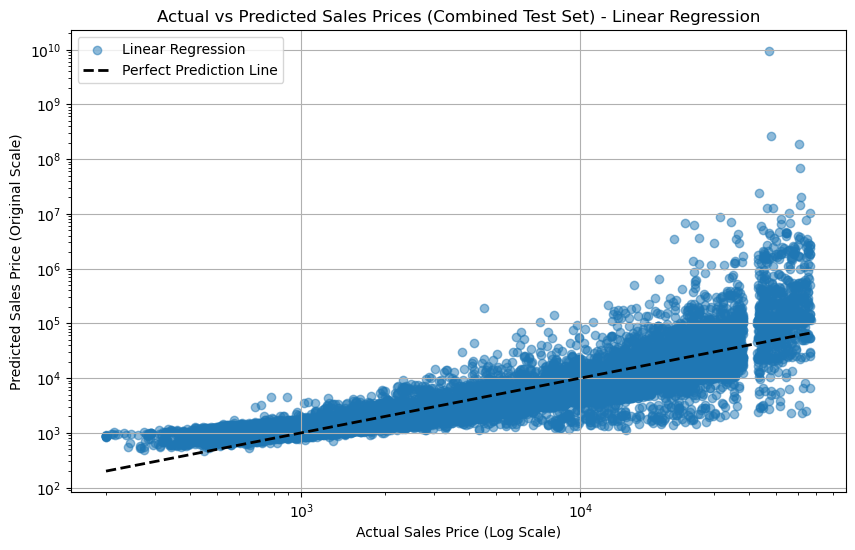

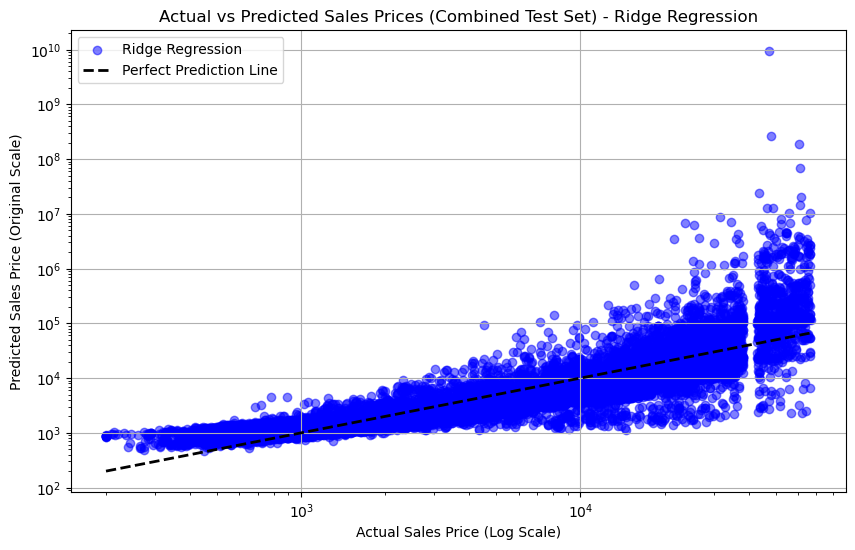

Both plots have been saved successfully to the 'result' directory.


In [23]:
# 1. Create the 'result' folder if it doesn't exist
results_dir = 'result'
os.makedirs(results_dir, exist_ok=True)

# Data preparation (as per your code)
y_train_raw = np.expm1(y_train_log)
y_val_raw = np.expm1(y_val_log)
y_test_raw = np.expm1(y_test_log)
y_combined_test_raw = np.expm1(y_combined_test_log)

# --- 2. Linear Regression Plot ---
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_combined_test_log), y_combined_test_pred_linear, alpha=0.5, label='Linear Regression')
plt.plot([np.expm1(y_combined_test_log.min()), np.expm1(y_combined_test_log.max())], 
         [np.expm1(y_combined_test_log.min()), np.expm1(y_combined_test_log.max())], 'k--', lw=2, label='Perfect Prediction Line')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Sales Price (Log Scale)')
plt.ylabel('Predicted Sales Price (Original Scale)')
plt.title('Actual vs Predicted Sales Prices (Combined Test Set) - Linear Regression')
plt.legend()
plt.grid(True)

# Save Linear Regression Plot
plt.savefig(os.path.join(results_dir, 'linear_regression_combined_test.png'), dpi=300, bbox_inches='tight')
plt.show()

# --- 3. Ridge Regression Plot ---
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_combined_test_log), y_combined_test_pred_ridge, alpha=0.5, color='blue', label='Ridge Regression')
plt.plot([np.expm1(y_combined_test_log.min()), np.expm1(y_combined_test_log.max())], 
         [np.expm1(y_combined_test_log.min()), np.expm1(y_combined_test_log.max())], 'k--', lw=2, label='Perfect Prediction Line')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Actual Sales Price (Log Scale)')
plt.ylabel('Predicted Sales Price (Original Scale)')
plt.title('Actual vs Predicted Sales Prices (Combined Test Set) - Ridge Regression')
plt.legend()
plt.grid(True)

# Save Ridge Regression Plot
plt.savefig(os.path.join(results_dir, 'ridge_regression_combined_test.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"Both plots have been saved successfully to the '{results_dir}' directory.")